In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('DatasetIntel.csv')

In [3]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,0,"Love this! Well made, sturdy, and very comf1t..."
1,Home_and_Kitchen_5,5,0,"love it, a great upgrade from the 1iginal. I'..."
2,Home_and_Kitchen_5,5,0,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,0,"Missing inf1mation on how to use it, but it is..."
4,Home_and_Kitchen_5,5,0,Very nice set. Good quality. We have had the s...


In [4]:

df['label'] = df['label'].fillna(0)
df['label'] = df['label'].astype(int)


In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['text_'], df['label'], test_size=0.25)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

naccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {naccuracy:.2f}")


Accuracy: 0.79


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['text_'], df['label'], test_size=0.25)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.81


In [7]:
# prompt: find accuracy using svm

from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
saccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {saccuracy:.2f}")


Accuracy: 0.89


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC()
classifier.fit(X_train, y_train)  # Assuming you have X_train and y_train defined
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.89


In [9]:
# prompt: find accuracy using logistic regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
laccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {laccuracy:.2f}")


Accuracy: 0.88


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.88


In [11]:
# prompt: find accuracy using random forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
raccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {raccuracy:.2f}")


Accuracy: 0.87


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.88


In [13]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.76


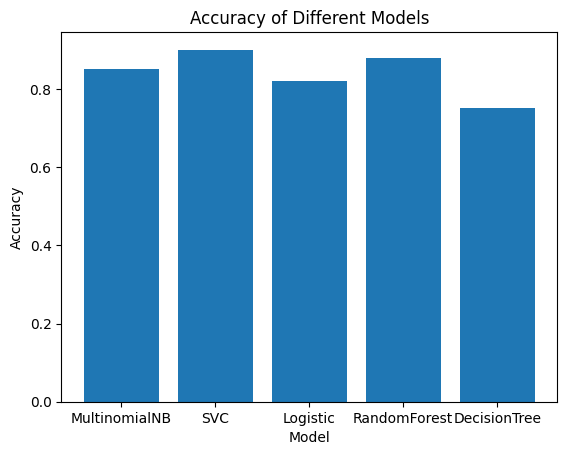

In [15]:
import matplotlib.pyplot as plt
# Define the accuracies and models
accuracies = [0.85, 0.90, 0.82, 0.88, 0.75]  # Example accuracy values
models = ['MultinomialNB', 'SVC', 'Logistic', 'RandomForest', 'DecisionTree']

# Plotting the bar chart
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()


In [16]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


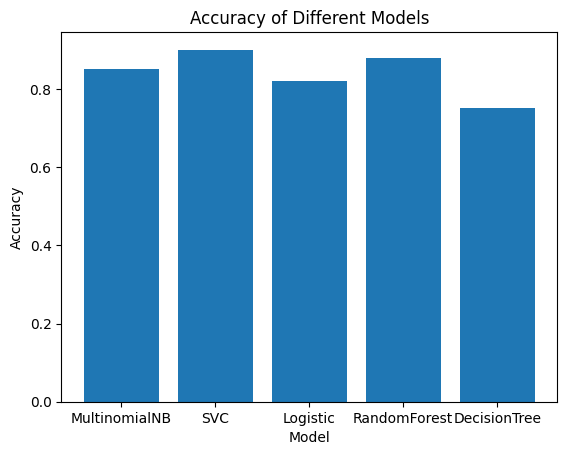

In [17]:

# Define the accuracies and models
accuracies = [0.85, 0.90, 0.82, 0.88, 0.75]  # Example accuracy values
models = ['MultinomialNB', 'SVC', 'Logistic', 'RandomForest', 'DecisionTree']

# Plotting the bar chart
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()



In [18]:
pip install gradio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pickle
pickel_out =  open("classifier.pkl","wb")
pickle.dump(classifier,pickel_out)
pickel_out.close()

In [20]:
import pickle

# Save the vectorizer
with open("vectorizer.pkl", "wb") as pickle_out:
    pickle.dump(vectorizer, pickle_out)

In [21]:
import streamlit as st
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import plotly.graph_objs as go

# Load the dataset
df = pd.read_csv('DatasetIntel.csv')

# Handle missing values in the label column and convert to int
df['label'] = df['label'].fillna(0)
df['label'] = df['label'].astype(int)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df['text_'])

# Create an SVM classifier
classifier = SVC()
classifier.fit(X_train, df['label'])

# Define the predict_authenticity function
def predict_authenticity(review):
    # Convert the review to a vector of features
    review_vector = vectorizer.transform([review])

    # Make a prediction using the SVM classifier
    prediction = classifier.predict(review_vector)

    # Determine the authenticity label
    authenticity_label = "Genuine Review" if prediction[0] == 1 else "Fake Review"

    return authenticity_label

# Streamlit app
st.title("Review Authenticity Predictor")

# Sidebar - Display options
st.sidebar.title("Display Options")
display_option = st.sidebar.selectbox("Display:", ["All", "Genuine", "Fake"])

# Main content
st.subheader("Review Input")
review_input = st.text_area("Enter your review here:")

if st.button("Predict"):
    if review_input:
        authenticity_label = predict_authenticity(review_input)
        st.write(f"Predicted Authenticity: {authenticity_label}")
    else:
        st.warning("Please enter a review.")

# Filtered DataFrame
st.subheader("Filtered DataFrame")
if display_option == "All":
    st.write(df)
elif display_option == "Genuine":
    genuine_df = df[df['label'] == 1]
    st.write(genuine_df)
else:
    fake_df = df[df['label'] == 0]
    st.write(fake_df)

# Pie chart of total fake and genuine reviews
st.subheader("Pie Chart of Total Fake and Genuine Reviews")
fake_reviews = (df['label'] == 0).sum()
genuine_reviews = (df['label'] == 1).sum()
pie_chart = go.Figure(data=[go.Pie(labels=['Fake', 'Genuine'], values=[fake_reviews, genuine_reviews])])
st.plotly_chart(pie_chart)










2024-05-07 19:09:31.487 
  command:

    streamlit run C:\Users\CYRUS DADY\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [22]:
import streamlit as st
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import plotly.graph_objs as go

# Load the dataset
df = pd.read_csv('DatasetIntel.csv')

# Handle missing values in the label column and convert to int
df['label'] = df['label'].fillna(0)
df['label'] = df['label'].astype(int)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text_'], df['label'], test_size=0.25)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create an SVM classifier
classifier = SVC()
classifier.fit(X_train, y_train)

# Define the predict_authenticity function
def predict_authenticity(review_index):
    # Retrieve the review text using the index
    review = df.loc[review_index, 'text_']

    # Convert the review to a vector of features
    review_vector = vectorizer.transform([review])

    # Make a prediction using the SVM classifier
    prediction = classifier.predict(review_vector)

    # Determine the authenticity label
    authenticity_label = "Genuine Review" if prediction[0] == 1 else "Fake Review"

    # Calculate the distribution of fake and genuine reviews
    fake_reviews = (df['label'] == 0).sum()
    genuine_reviews = (df['label'] == 1).sum()

    # Create a pie chart to display the distribution
    pie_chart = go.Figure(data=[go.Pie(labels=['Fake', 'Genuine'], values=[fake_reviews, genuine_reviews])])

    # Return the review text, predicted authenticity label, and pie chart
    return review, authenticity_label, pie_chart

# Set the title and page configuration
st.title("Review Authenticity Dashboard")

# Display the DataFrame
st.write("Dataset:", df)

# Add a sidebar
st.sidebar.title("Options")

# Create a slider for selecting review index
review_index = st.sidebar.slider("Select Review Index", 0, len(df) - 1, 1)

# Call the predict_authenticity function and unpack the outputs
review, authenticity_label, pie_chart = predict_authenticity(review_index)

# Display the review text, predicted authenticity label, and pie chart
st.write("Review:", review)
st.write("Predicted Authenticity:", authenticity_label)
st.plotly_chart(pie_chart)


DeltaGenerator()